## Examination of S&P 500 Stock Pricing Movements

## Import Libraries

In [16]:
import pandas as pd
import datetime as dt

In [18]:
df = pd.read_csv('/Users/rev.dr.sylviablessings/Downloads/stock/all_stocks_5yr.csv')

In [19]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [20]:
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


## Data Cleaning

In [22]:
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [23]:
df.dropna()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [24]:
# Convert the data column to datetime format
def changeintoDatetime(col):
    df[col] = pd.to_datetime(df[col])

In [26]:
changeintoDatetime('date')

In [27]:
# Check for duplicates
print(df.duplicated().sum())

0


In [29]:
# Handle Outliers
q1 = df['close'].quantile(0.25)
q3 = df['close'].quantile(0.75)
IQR = q3 - q1
upperBound = q3 + 1.5 * IQR
df = df[df['close'] <= upperBound]

## Data Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_92028/1318613844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])


## Visualize the S&P500 Pricing Actions

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

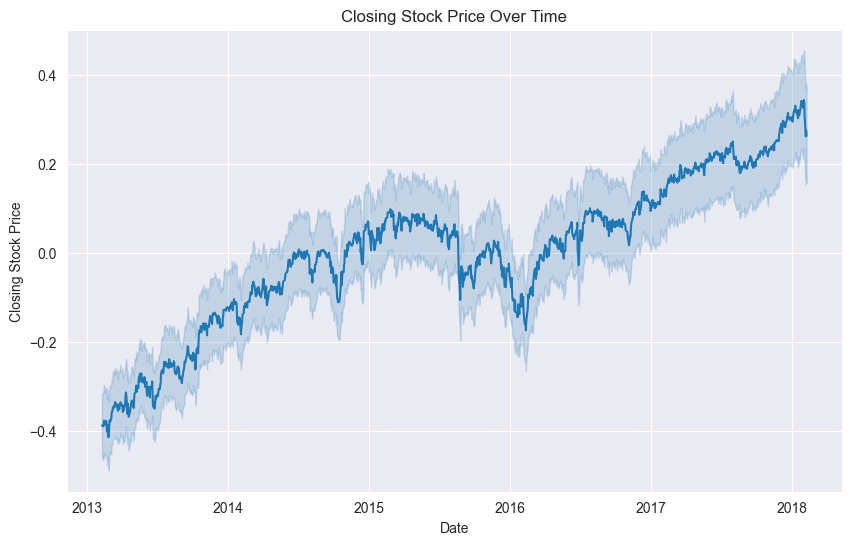

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

## Visualize Stock Price by the Traded Volume

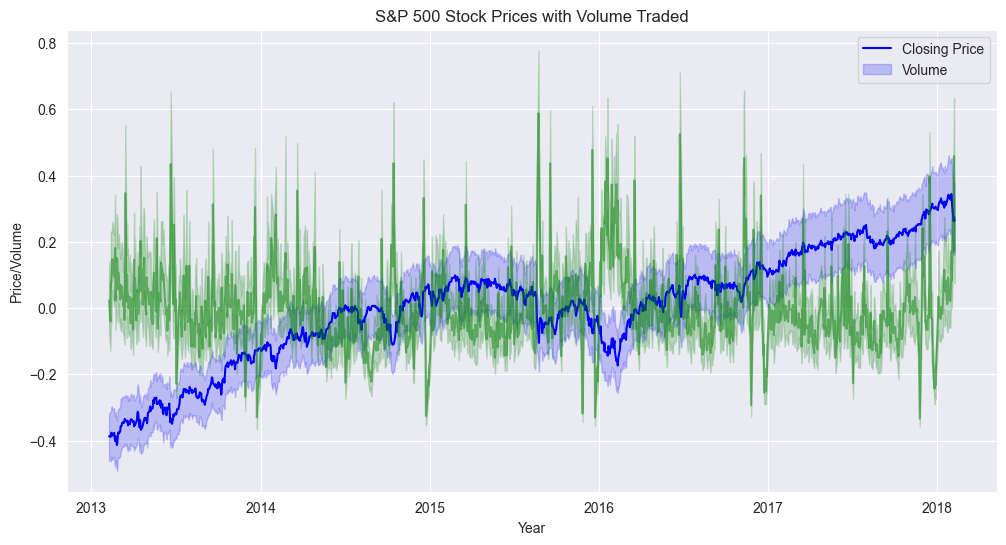

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='close', data=df, color='b')
sns.lineplot(x='date', y='volume', data=df, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_92028/2661473499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['date'].dt.year


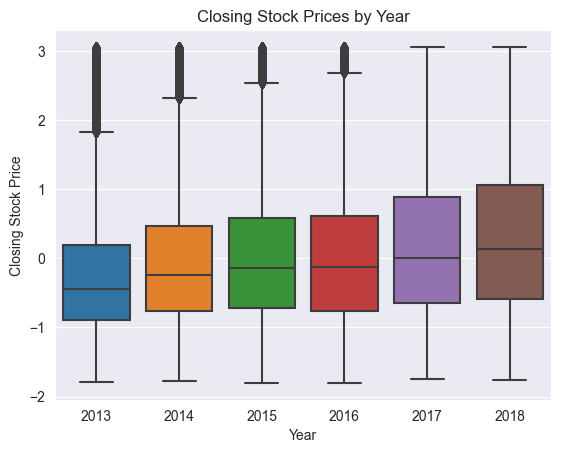

In [35]:
df['Year'] = df['date'].dt.year
sns.boxplot(x='Year', y='close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

## Examining the Closing Stock Prices of Multiple S&P500 Companies
-- For the top 5 companies in the S&P500 by market capitalization

source: https://www.investopedia.com/ask/answers/08/find-stocks-in-sp500.asp

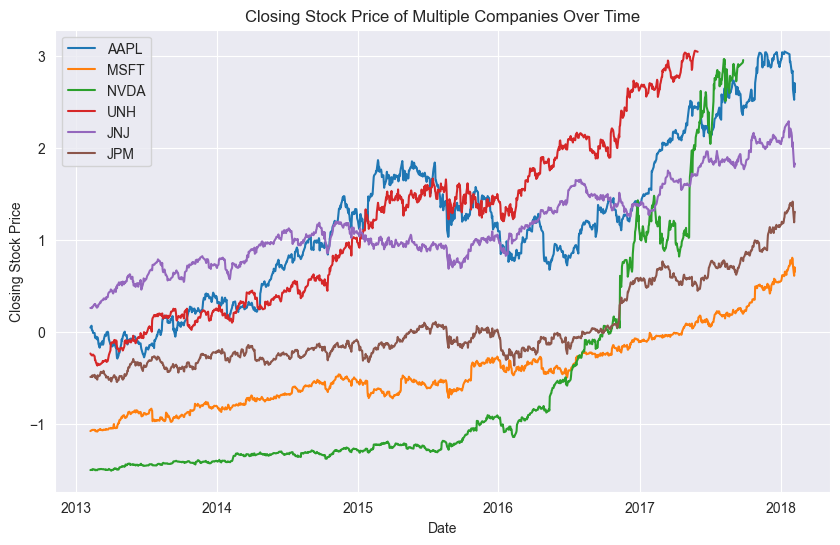

In [40]:
companies = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOGL', 'META', 'UNH','JNJ', 'JPM']
plt.figure(figsize=(10,6))
for company in companies:
    company_df = df[df['Name']==company]
    sns.lineplot(x='date', y='close', data=company_df, label=company)
plt.title('Closing Stock Price of Multiple Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()